## **Import Libraries**

In [172]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import os
import time
import warnings
import os
from six.moves import urllib
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [173]:
#Add All the Models Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


# Plotly
import plotly.express as px

# Models

from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from scipy.stats import reciprocal, uniform


# Cross-validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate


#Common data processors
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from scipy import sparse

#Accuracy Score
from sklearn.metrics import accuracy_score

from tqdm import tqdm_notebook as tqdm

In [174]:
# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## **Load Datasets**

In [177]:
X_train = reduce_mem_usage(pd.read_parquet("/content/drive/MyDrive/Sonova/Train.parquet")) #read the data from the csv file.
X_test = reduce_mem_usage(pd.read_parquet("/content/drive/MyDrive/Sonova/Test.parquet"))

y_train = pd.read_csv("/content/drive/MyDrive/Sonova/y_Train.csv")
y_test =  pd.read_csv("/content/drive/MyDrive/Sonova/y_Test.csv")

Mem. usage decreased to 105.77 Mb (75.0% reduction)
Mem. usage decreased to 26.44 Mb (75.0% reduction)


In [178]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(490737, 113)
(122685, 113)
(490737, 1)
(122685, 1)


## **Model 1 : Random Forest Classifer**

In [179]:
#Design the random forest classifier

# Random Forest Classifier

n_estimators = [10, 200]
max_features = [0.1, 0.5]
max_depth = [2, 10, 20] 
oob_score = [True, False]
min_samples_split = [0.1, 0.5]
min_samples_leaf = [0.1, 0.5]
max_leaf_nodes = [2, 10, 100]

parameter_random_forest = {'n_estimators' : n_estimators, 'max_features' : max_features,
                     'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                    'oob_score' : oob_score, 'min_samples_leaf': min_samples_leaf, 
                     'max_leaf_nodes' : max_leaf_nodes}
             
Random_Forest_Classifier = RandomForestClassifier(random_state = 42)

#use grid search to tune the model

Rand_Srch_RanForest = RandomizedSearchCV(Random_Forest_Classifier,parameter_random_forest, cv = 4, n_iter = 10, scoring='roc_auc', refit = True,
                                     n_jobs = -1, verbose=2)

Rand_Srch_RanForest.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 12.1min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

### **Best Parameters : Random Forest Classifer**

In [180]:
forest_best_params_ = Rand_Srch_RanForest.best_params_
forest_best_estimators_ = Rand_Srch_RanForest.best_estimator_

print(forest_best_params_)
print(forest_best_estimators_)

{'oob_score': True, 'n_estimators': 200, 'min_samples_split': 0.1, 'min_samples_leaf': 0.1, 'max_leaf_nodes': 10, 'max_features': 0.1, 'max_depth': 10}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=0.1,
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)


## **Model 2 : ADA Boost Classifer**

In [181]:
# Now Build the ADA Boost Classifier

n_estimators = [10, 200]
learning_rate = [0.05, 0.01]
algorithm = ['SAMME', 'SAMME.R']

Ada_Classifer = AdaBoostClassifier(random_state = 42)
parameter_Ada_Classifer = {'n_estimators' : n_estimators, 'learning_rate' : learning_rate, 'algorithm' : algorithm}
grid_search_AdaClassifier = RandomizedSearchCV(Ada_Classifer, parameter_Ada_Classifer, cv = 4, scoring='roc_auc', n_iter = 10, refit = True, n_jobs = -1, verbose = 2)
grid_search_AdaClassifier.fit(X_train,y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 77.0min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=42),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.05, 0.01],
                                        'n_estimators': [10, 200]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=2)

### **Best Parameters : ADA Boost Classifier**

In [182]:
AdaClassifier_best_params_ = grid_search_AdaClassifier.best_params_
AdaClassifier_best_estimators_ = grid_search_AdaClassifier.best_estimator_
print(AdaClassifier_best_params_)
print(AdaClassifier_best_estimators_)

{'n_estimators': 200, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=42)


## **Model 3 : Extra Trees Classifier**

In [183]:
# The next we build is an Extra Trees Classifier

Extra_Classifier = ExtraTreesClassifier(random_state = 42)

n_estimators = [10, 200]
max_features = [0.1, 0.5]
max_depth = [2, 10, 20] 
min_samples_split = [0.1, 0.5]
min_samples_leaf = [0.1, 0.5]

parameter_Extra_Classifier = {'n_estimators' : n_estimators, 'max_features' : max_features,
                         'max_depth' : max_depth, 'min_samples_split' : min_samples_split,
                         'min_samples_leaf' : min_samples_leaf}

grid_search_ExtraClassifier = RandomizedSearchCV(Extra_Classifier, parameter_Extra_Classifier, cv = 4, n_iter=10, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2)
grid_search_ExtraClassifier.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.8min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

### **Best Parameters : Extra Trees Classifier**

In [184]:
Extra_Classifier_best_params_ = grid_search_ExtraClassifier.best_params_
Extra_Classifier_best_estimators_ = grid_search_ExtraClassifier.best_estimator_
print(Extra_Classifier_best_params_)
print(Extra_Classifier_best_estimators_)

{'n_estimators': 200, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 0.5, 'max_depth': 20}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=20, max_features=0.5,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=0.1, min_samples_split=0.5,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


## **Model 4 : Logistic Regression**

In [185]:
Logistic_Regression = LogisticRegression(random_state = 42)
C = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
                            
parameter_LogReg = {'C' : C}
grid_search_LogReg = RandomizedSearchCV(Logistic_Regression, parameter_LogReg, cv = 4, scoring='roc_auc', 
                               refit = True, n_jobs = -1, verbose = 2, n_iter=10)

grid_search_LogReg.fit(X_train,y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.7min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 0.2,
                                              0.3]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=2)

### **Best Parameters : Logistic Regression Classifier**

In [186]:
Logistic_best_params_ = grid_search_LogReg.best_params_
Logistic_best_estimators_ = grid_search_LogReg.best_estimator_
print(Logistic_best_params_)
print(Extra_Classifier_best_estimators_)

{'C': 0.3}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=20, max_features=0.5,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=0.1, min_samples_split=0.5,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


## **Model Interpretations and Evaluation : Random Forest**

### **ROC AUC : Random Forest Evaluation (on Method = Predict Proba)**

In [187]:
#Random Forest AUC score on Training Set
from sklearn.metrics import roc_auc_score
y_RF_Prediction = forest_best_estimators_.predict_proba(X_train)
y_RF_Scores = y_RF_Prediction[:, 1] # score = proba of positive class
print(roc_auc_score(y_train, y_RF_Scores))

0.7588039859331145


In [188]:
#Random Forest AUC score on Test Set
y_RF_TPrediction = forest_best_estimators_.predict_proba(X_test)
y_RF_TScores = y_RF_TPrediction[:, 1] # score = proba of positive class
print(roc_auc_score(y_test,y_RF_TScores))

0.7590762182861959


### **Confusion Matrix : Random Forest**

In [189]:
#Create the confusion Matrix on the training set for Random Forest Classifier
from sklearn.metrics import confusion_matrix
predict_RClassifier = cross_val_predict(forest_best_estimators_,X_train,y_train, cv=4)
confusion_matrix(y_train, predict_RClassifier)

array([[211757,  47676],
       [ 82850, 148454]])

In [190]:
#Create the confusion Matrix on the test set for Random Forest Classifier
predict_TRClassifier = cross_val_predict(forest_best_estimators_,X_test,y_test, cv=4)
confusion_matrix(y_test, predict_TRClassifier)

array([[53324, 11590],
       [21054, 36717]])

### **Precision and Recall Score : Random Forest**

In [191]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score for Training Set : {} ".format(precision_score(y_train,predict_RClassifier)))
print("Recall Score for Training Set : {}".format(recall_score(y_train,predict_RClassifier)))

Precision Score for Training Set : 0.7569163310049457 
Recall Score for Training Set : 0.6418133711479266


In [192]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score for Test Set : {} ".format(precision_score(y_test,predict_TRClassifier)))
print("Recall Score for Test Set : {}".format(recall_score(y_test,predict_TRClassifier)))

Precision Score for Test Set : 0.7600761794356925 
Recall Score for Test Set : 0.6355610946668744


### **Feature Importance : Random Forest**

In [196]:
Total_Features = [col for col in X_train.columns]
feature_importance_rf = pd.DataFrame()
feature_importance_rf["feature"] = Total_Features
feature_importance_rf["importance"] = forest_best_estimators_.feature_importances_
feature_importance_rf.sort_values(by=['importance'],ascending=False, inplace=True)
feature_importance_rf = feature_importance_rf[feature_importance_rf['importance']!=0]
feature_importance_rf = feature_importance_rf.reset_index()
feature_importance_rf.drop(['index'],axis=1,inplace=True)

In [256]:
colors = ['Other Features'] * 63
colors[62] = 'Most Important Feature'
feature_importance_rf = feature_importance_rf.sort_values(by=['importance'])
fig = px.bar(feature_importance_rf, x="importance", y="feature", orientation='h', width = 1000, height=1200,color=colors,title="Feature Importance - Random Forest")
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='Feature: %{y} <br> Importance: %{x}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))
fig.show()

## **Model Interpretations and Evaluation : ADA Boost Evaluation**

### **ROC AUC : ADA Boost Evaluation (on Method = Predict Proba)**

In [201]:
#ADA Boost AUC score on Training Set
y_ADA_Prediction = AdaClassifier_best_estimators_.predict_proba(X_train)
y_ADA_Scores = y_ADA_Prediction[:, 1] # score = proba of positive class
print(roc_auc_score(y_train, y_ADA_Scores))

0.8028359407589183


In [202]:
#ADA Boost AUC score on Training Set
y_ADA_TPrediction = AdaClassifier_best_estimators_.predict_proba(X_test)
y_ADA_TScores = y_ADA_TPrediction[:, 1] # score = proba of positive class
print(roc_auc_score(y_test, y_ADA_TScores))

0.8025715433520053


### **Confusion Matrix : ADA Boost**

In [203]:
#Create the confusion Matrix on the training set for ADA Boost Classifier
from sklearn.metrics import confusion_matrix
predict_ADAClassifier = cross_val_predict(AdaClassifier_best_estimators_,X_train,y_train, cv=4)
confusion_matrix(y_train, predict_ADAClassifier)

array([[208092,  51341],
       [ 70271, 161033]])

In [204]:
predict_TADAClassifier = cross_val_predict(AdaClassifier_best_estimators_,X_test,y_test, cv=4)
confusion_matrix(y_test, predict_TADAClassifier)

array([[52022, 12892],
       [17698, 40073]])

### **Precision and Recall Score : ADA Boost**

In [205]:
#Precision and Recall for ADA Boost : Train
from sklearn.metrics import precision_score, recall_score
print("Precision Score for Training Set : {} ".format(precision_score(y_train,predict_ADAClassifier)))
print("Recall Score for Training Set : {}".format(recall_score(y_train,predict_ADAClassifier)))

Precision Score for Training Set : 0.7582519517455055 
Recall Score for Training Set : 0.6961963476636807


In [206]:
#Precision and Recall for ADA Boost : Test
print("Precision Score for Training Set : {} ".format(precision_score(y_test,predict_TADAClassifier)))
print("Recall Score for Training Set : {}".format(recall_score(y_test,predict_TADAClassifier)))

Precision Score for Training Set : 0.7565939771547249 
Recall Score for Training Set : 0.6936525246230808


### **Feature Importance : ADA Boost**

In [207]:
Total_Features = [col for col in X_train.columns]
feature_importance_ada = pd.DataFrame()
feature_importance_ada["feature"] = Total_Features
feature_importance_ada["importance"] = AdaClassifier_best_estimators_.feature_importances_
feature_importance_ada.sort_values(by=['importance'],ascending=False, inplace=True)
feature_importance_ada = feature_importance_ada[feature_importance_ada['importance']!=0]
feature_importance_ada = feature_importance_ada.reset_index()
feature_importance_ada.drop(['index'],axis=1,inplace=True)

In [208]:
colors = ['Other Features'] * 21
colors[20] = 'Most Important Feature'
feature_importance_ada = feature_importance_ada.sort_values(by=['importance'])
fig = px.bar(feature_importance_ada, x="importance", y="feature", orientation='h', width = 1000, height=700,color=colors,title="Feature Importance - ADA Boost")
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='Feature: %{y} <br> Importance: %{x}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))
fig.show()

## **Model Interpretations and Evaluation : Extra Trees Evaluation**

### **ROC AUC : Extra Trees Evaluation (on Method = Predict Proba)**

In [209]:
y_ET_Prediction = Extra_Classifier_best_estimators_.predict_proba(X_train)
y_ET_Scores = y_ET_Prediction[:, 1] # score = proba of positive class
print(roc_auc_score(y_train, y_ET_Scores))

0.6817363832179837


In [210]:
y_RF_TPrediction = Extra_Classifier_best_estimators_.predict_proba(X_test)
y_ET_TScores = y_RF_TPrediction[:, 1] # score = proba of positive class
print(roc_auc_score(y_test , y_ET_TScores))

0.6832351851993979


### **Confusion Matrix : Extra Trees Classifier**

In [211]:
### **Confusion Matrix : EXTRA TREES - Training Set*
predict_ETClassifier = cross_val_predict(Extra_Classifier_best_estimators_,X_train,y_train, cv=4)
confusion_matrix(y_train, predict_ETClassifier)

array([[196033,  63400],
       [119104, 112200]])

In [212]:
### **Confusion Matrix : EXTRA TREES - Test Set*
predict_ET_TClassifier = cross_val_predict(Extra_Classifier_best_estimators_,X_test,y_test, cv=4)
confusion_matrix(y_test, predict_ET_TClassifier)

array([[49160, 15754],
       [29843, 27928]])

### **Precision and Recall Score : Extra Trees Classifier**

In [213]:
### **Precision and Recall Score : Extra Trees training set**
from sklearn.metrics import precision_score, recall_score
print("Precision Score for Training Set : {} ".format(precision_score(y_train,predict_ETClassifier)))
print("Recall Score for Training Set : {}".format(recall_score(y_train,predict_ETClassifier)))

Precision Score for Training Set : 0.6389521640091116 
Recall Score for Training Set : 0.4850759174073946


In [214]:
### **Precision and Recall Score : Extra Trees test set**
from sklearn.metrics import precision_score, recall_score
print("Precision Score for Training Set : {} ".format(precision_score(y_test,predict_ET_TClassifier)))
print("Recall Score for Training Set : {}".format(recall_score(y_test,predict_ET_TClassifier)))

Precision Score for Training Set : 0.6393480152007692 
Recall Score for Training Set : 0.48342594035069497


### **Feature Importance : Extra Trees**

In [215]:
Total_Features = [col for col in X_train.columns]
feature_importance_et = pd.DataFrame()
feature_importance_et["feature"] = Total_Features
feature_importance_et["importance"] = Extra_Classifier_best_estimators_.feature_importances_
feature_importance_et.sort_values(by=['importance'],ascending=False, inplace=True)
feature_importance_et = feature_importance_et[feature_importance_et['importance']!=0]
feature_importance_et = feature_importance_et.reset_index()
feature_importance_et.drop(['index'],axis=1,inplace=True)

In [217]:
colors = ['Other Features'] * 19
colors[18] = 'Most Important Feature'
feature_importance_et = feature_importance_et.sort_values(by=['importance'])
fig = px.bar(feature_importance_et, x="importance", y="feature", orientation='h', width = 1000, height=700,color=colors,title="Feature Importance - Extra Trees")
fig.update_yaxes(dtick=1,tickformat='.0f')
fig.update_traces(hovertemplate='Feature: %{x} <br> Importance: %{y}') #
fig.update_layout(legend=dict(
    yanchor="bottom",
    x=0.998,
    xanchor="right",
    y=0.002
))
fig.show()

## **Model Interpretations and Evaluation : Logistic Regression**

### **ROC AUC : Logistic Regression Evaluation (on Method = Predict Proba)**

In [218]:
y_LR_Prediction = Logistic_best_estimators_.predict_proba(X_train)
y_LR_Scores = y_LR_Prediction[:, 1] # score = proba of positive class
print(roc_auc_score(y_train, y_LR_Scores))

0.8159859849312624


In [219]:
y_LR_TPrediction = Logistic_best_estimators_.predict_proba(X_test)
y_LR_TScores = y_LR_TPrediction[:, 1] # score = proba of positive class
print(roc_auc_score(y_test, y_LR_TScores))

0.8162098482433391


### **Confusion Matrix : Logistic Regression**

In [220]:
### **Confusion Matrix : Logistic Regression - Training Set*
predict_LRClassifier = cross_val_predict(Logistic_best_estimators_,X_train,y_train, cv=4)
confusion_matrix(y_train, predict_LRClassifier)

array([[206298,  53135],
       [ 65952, 165352]])

In [221]:
predict_LR_TClassifier = cross_val_predict(Logistic_best_estimators_,X_test,y_test, cv=4)
confusion_matrix(y_test, predict_LR_TClassifier)

array([[51592, 13322],
       [16512, 41259]])

### **Precision and Recall Score : Logistic Regression**

In [222]:
### **Precision and Recall Score : Logistic Regression training set**
from sklearn.metrics import precision_score, recall_score
print("Precision Score for Training Set : {} ".format(precision_score(y_train,predict_LRClassifier)))
print("Recall Score for Training Set : {}".format(recall_score(y_train,predict_LRClassifier)))

Precision Score for Training Set : 0.7568047526855145 
Recall Score for Training Set : 0.7148687441635251


In [223]:
### **Precision and Recall Score : Logistic Regression training set**
from sklearn.metrics import precision_score, recall_score
print("Precision Score for Training Set : {} ".format(precision_score(y_test,predict_LR_TClassifier)))
print("Recall Score for Training Set : {}".format(recall_score(y_test,predict_LR_TClassifier)))

Precision Score for Training Set : 0.755922390575475 
Recall Score for Training Set : 0.7141818559484863


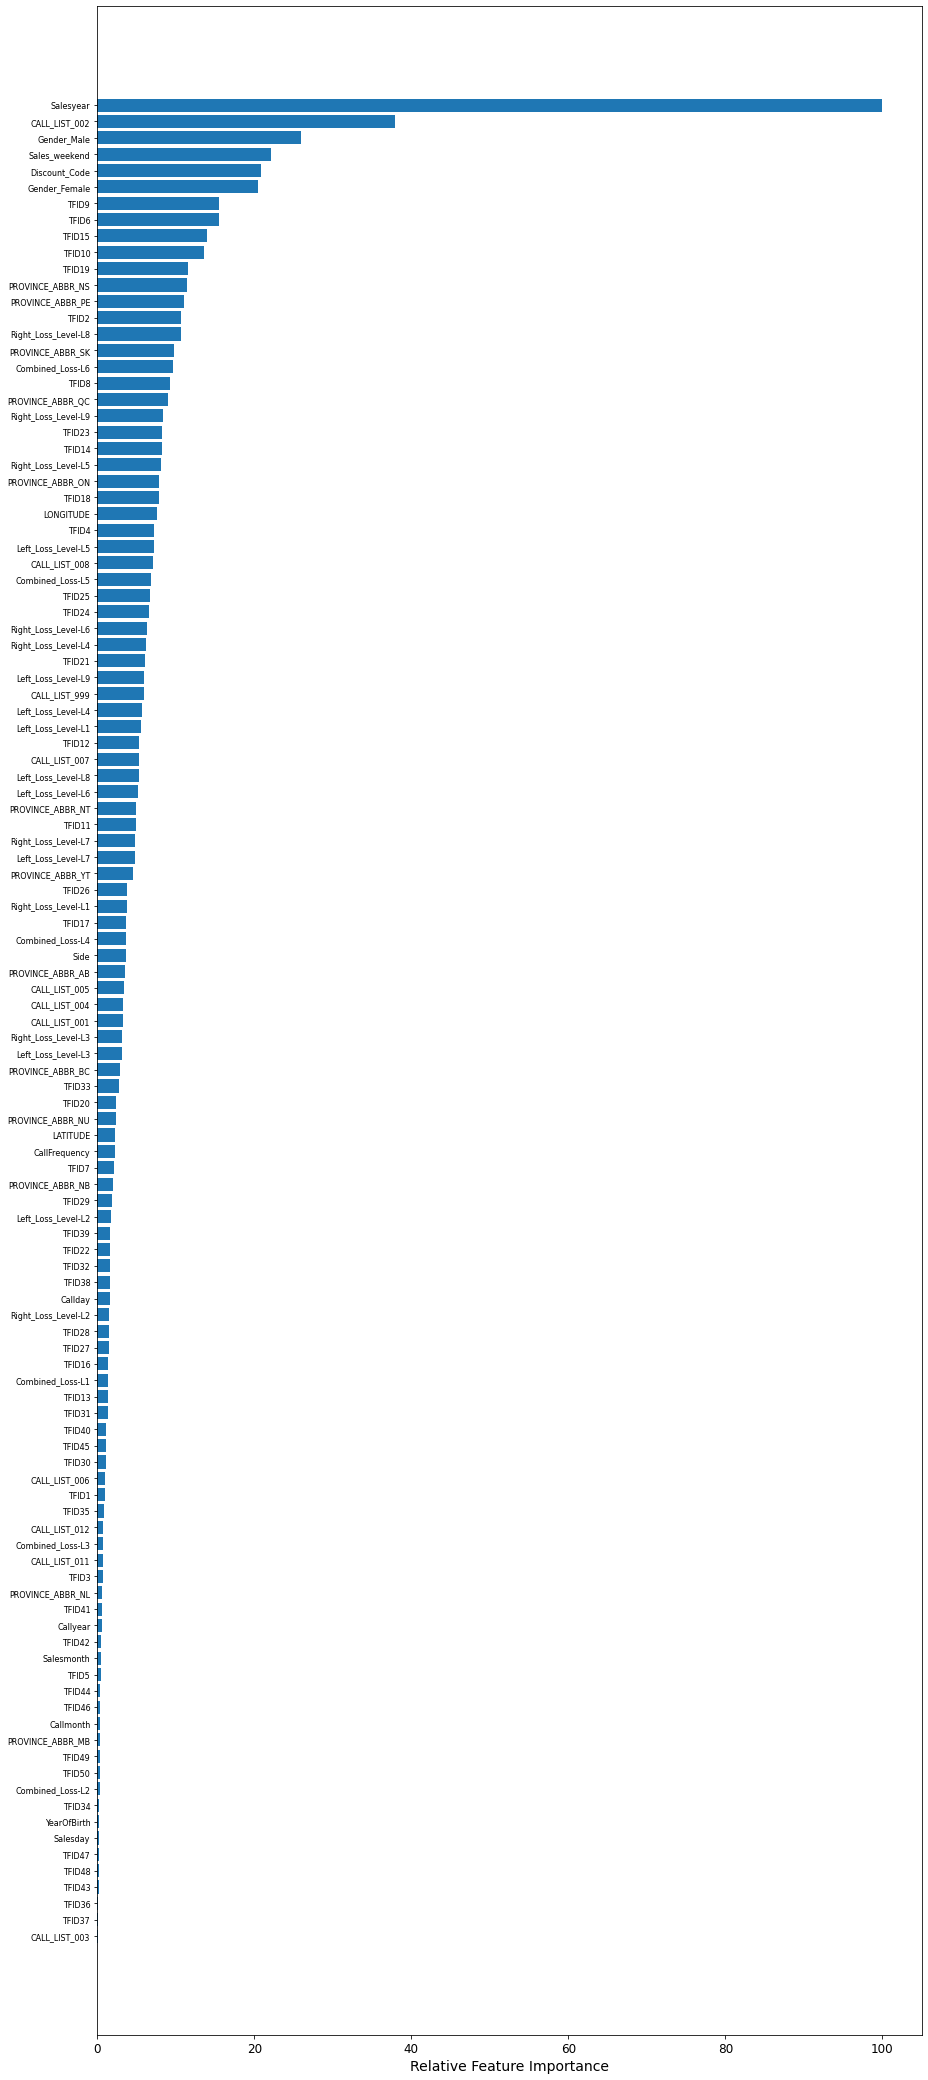

In [252]:
feature_importance = abs(Logistic_best_estimators_.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure()
featax = featfig.add_subplot(1,1,1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.rcParams["figure.figsize"] = [16,29]
plt.tight_layout()   
plt.show()

## **Model Comparison**

### **ROC-AUC Curves**

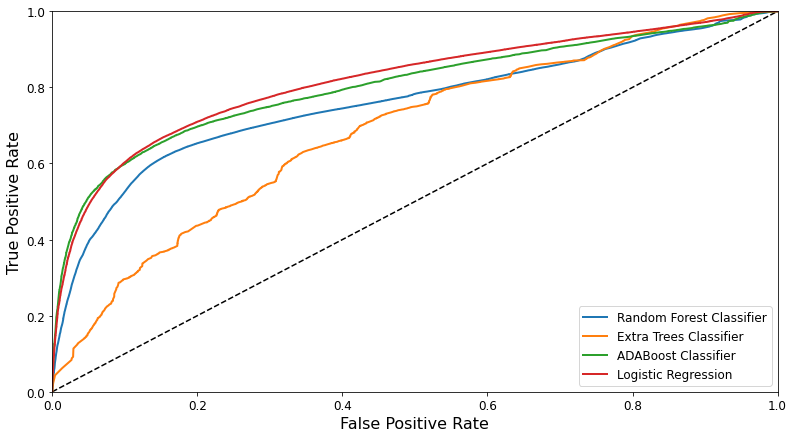

In [268]:
from sklearn.metrics import roc_curve

#for random forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train , y_RF_Scores)

#For extra trees
fpr_et, tpr_et, thresholds_et = roc_curve(y_test , y_ET_TScores)

#for ADA Boost
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_ADA_TScores)

#logistic regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_LR_TScores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
#Plot the Roc Curve
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest Classifier")
plt.plot(fpr_et, tpr_et, linewidth=2, label="Extra Trees Classifier")
plt.plot(fpr_ada, tpr_ada, linewidth=2, label="ADABoost Classifier")
plt.plot(fpr_lr, tpr_lr, linewidth=2, label="Logistic Regression")
plt.legend(loc="lower right", fontsize=12)
plt.rcParams["figure.figsize"] = [11,7]
plt.show()

**Using SKlearn Models metrics : ROC-AUC Score and Recall Score, Logistic Regression model is the Best Model.**